## I use the code for dot tracking to get the local strain measurement and compare it to the macroscopic stress-strain value obtained from the mechanoconfocal
### For this experiment I have just done the global measurement from the labview and not the local since the verification that both are equal has been done for experiment 20240515_rtv_box1_scotch3_test_1


In [2]:
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
import math
import sys
import os
%matplotlib inline

## Load the csv data for the mechanoconfocal

In [3]:

data= np.loadtxt('macro_sample_rtv_20240514_box1_stodv1_3scotch_ten0.005_test1.txt')
data.shape
t1,force1,arm1,arm2,t2,force2 = data.T
l0 = 42 # in mm
area = 10e-6 # m2  thickness 1 mm and width 4 mm

In [4]:
time = np.zeros((t1.shape[0],))
strain = np.zeros((t1.shape[0],))
stress = np.zeros((t1.shape[0],))
force =  np.zeros((t1.shape[0],))

In [5]:
calib=1/190 #mV to N 
for i in range(time.shape[0]):
    time[i] = (t1[i]-t1[0])*1e-3
    strain[i] = ((arm1[0] + arm2[0]) - (arm1[i]+arm2[i]))/l0 
    force[i] = abs((force1[i]-force1[0]))*calib #in N
    stress[i] = force[i]/area

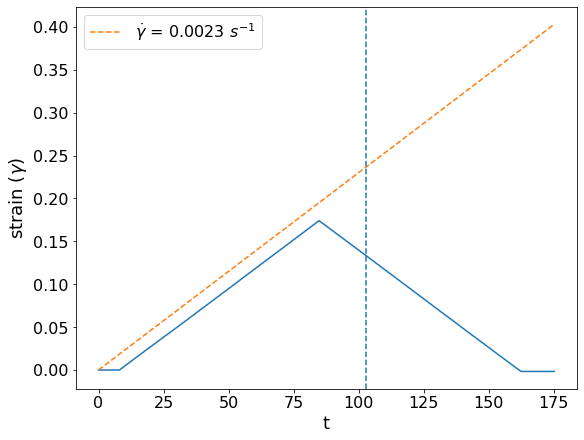

In [6]:
fig, axs = plt.subplots(1,1, figsize =(8,6), constrained_layout= True)
axs.plot(time, strain)
axs.plot(time-0.0047, 0.0023*time, '--', label = r'$\dot{\gamma}$ = 0.0023 $s^{-1}$') #0.01 mm/sis the value of trajectory input'
axs.set_ylabel('strain ($\gamma$)', fontsize =18)
axs.set_xlabel('t', fontsize = 18)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
axs.legend(fontsize = 16)
plt.axvline(70*1/0.68, linestyle = '--')

plt.savefig('20240515_rtv615_scotch3_stodv1_mechaconf_strain_rate.png')

#plt.savefig('20230223_ten0.001_strain_time_2.png')


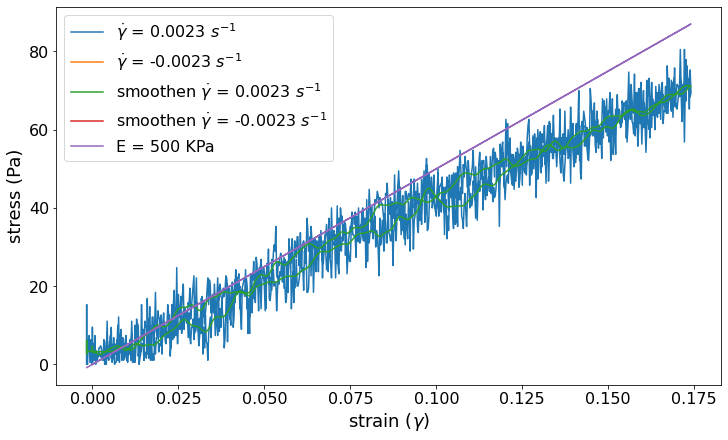

In [7]:
to = 200 # The time until which I want to plot the stress strain data
fig, axs = plt.subplots(1,1, figsize =(10,6), constrained_layout= True)
plt.plot(strain[(time<to)], stress[(time<to)], label = r'$\dot{\gamma}$ = 0.0023 $s^{-1}$')
plt.plot(strain[(time>to)], stress[(time>to)], label = r'$\dot{\gamma}$ = -0.0023 $s^{-1}$')
plt.plot(strain[(time<to)], gaussian_filter1d(stress[(time<to)],5), label = r'smoothen $\dot{\gamma}$ = 0.0023 $s^{-1}$')
plt.plot(strain[(time>to)], gaussian_filter1d(stress[(time>to)],5), label = r'smoothen $\dot{\gamma}$ = -0.0023 $s^{-1}$')

plt.plot(strain[(strain<0.2)],strain[(strain<0.2)]*500, label = 'E = 500 KPa')
axs.set_ylabel('stress (Pa)', fontsize =18)
axs.set_xlabel('strain ($\gamma$)', fontsize = 18)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
axs.legend(fontsize = 16)
#plt.savefig('20230223_ten0.01_strain_stress.png')

## I should verify for all experiments the stress strain loading and unloading data to see for spikes we see in the camera and confocal data

## I try to load the function for measuring strain rate from the camera data 

In [47]:
# Execute the Python file as if it were a script
%run "D:\ESPCI\espci_scripts\Thin_films\dot_deformation_tracking.py"

# After execution, you can use the functions and classes defined in the file
#my_function()


## Globally the strain rate are similar in the film and substrate 0.0023 and 0.0022 in x and 0.0009 in y.  The measured value from  the global is 0.0023. It matches. 